In [7]:
# import packages
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [8]:
# define network
class TwoReLUNet(nn.Module):
    def __init__(self, input_size, hidden_size,  output_size):
        super(TwoReLUNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    # only forward needed
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        return x

In [9]:
# initialize network
input_size = 1
hidden_size = 384
output_size = 1
learning_rate = 1e-3
model = TwoReLUNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [13]:
# generate training data
torch.manual_seed(0)
x = torch.linspace(-2*np.pi, 2*np.pi, 1000).view(-1, 1)
# y = torch.sin(x)
y = x**2

# shuffle the index
indices = np.random.permutation(len(x))
x = x[indices]
y = y[indices]

# convert to tensor
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# generate dataset and dataloader
dataset = TensorDataset(x_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# train
for epoch in range(1000):
    for inputs, targets in train_loader:
      # forward
      y_pred = model(inputs)
      loss = criterion(y_pred, targets)
      # backward
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


<ipython-input-13-924d6fec1f7e>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
<ipython-input-13-924d6fec1f7e>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


Epoch 0, Loss: 17.897701263427734
Epoch 100, Loss: 0.6697753667831421
Epoch 200, Loss: 0.1623990535736084
Epoch 300, Loss: 0.33466604351997375
Epoch 400, Loss: 0.05900543928146362
Epoch 500, Loss: 0.09338532388210297
Epoch 600, Loss: 0.01713649183511734
Epoch 700, Loss: 0.016616426408290863
Epoch 800, Loss: 0.01483490876853466
Epoch 900, Loss: 0.008172888308763504


## 评估

In [14]:
# evaluation at val
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        y_pred = model(inputs)
        test_loss += criterion(y_pred, targets).item()
test_loss /= len(test_loader)
print(f"Test Loss: {test_loss}")

Test Loss: 0.012480046832934022


## 可视化训练结果

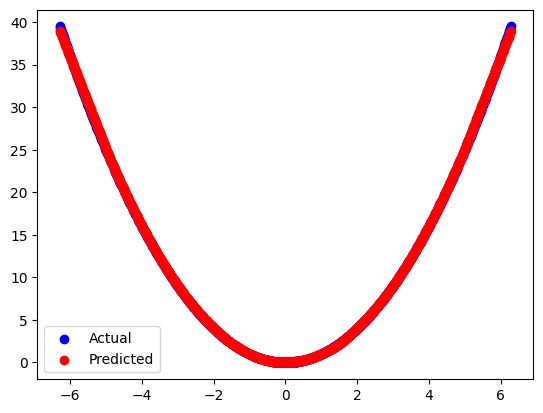

In [15]:
# print result
x_plot = np.linspace(-2*np.pi, 2*np.pi, 1000)
x_plot_tensor = torch.tensor(x_plot, dtype=torch.float32).view(-1, 1)
y_plot_tensor = model(x_plot_tensor).detach().numpy()
plt.scatter(x, y, c='b', label='Actual')
plt.scatter(x_plot, y_plot_tensor, c='r', label='Predicted')
plt.legend()
plt.show()